In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Read data from mesa data: 
a = pd.read_excel("Workbook1.xlsx")

# Read data after the initial module
f = open("kepler_xinlong_ONe6040-final.hse.5120","r")
data = f.readlines()  # data is a list. each element is a line of "23Ne...dat"
f.close()
del data[0:16]

data2d = []
for i in range(len(data)):
    data2d.append(re.split(r"[ ]",data[i].strip('\n')))

for i in range(len(data2d)):
        while '' in data2d[i]:
            data2d[i].remove('')

for i in range(len(data2d)-1,-1,-1):
    if len(data2d[i]) == 3:
        data2d.pop(i)
        #ll.append(i)
        i+=1
    else:
        data2d[i].append('0.9999999989999999E-10')
        data2d[i].append('0.9999999989999999E-10')
        data2d[i].append('0.9999999989999999E-10')
        #data2d[i].append('0.9999999989999999E-10')
        #mm.append(i)

data3d = np.array(data2d).astype(np.float)

df = pd.DataFrame(data3d)
df.columns = ['radius','density','temperature','pressure','ne20','o16','o20','mg24','f29','he4','al27','si28','s32','p31','h1']
df.head()

,radius,density,temperature,pressure,ne20,o16,o20,mg24,f29,he4,al27,si28,s32,p31,h1
0,24414.0625,8.357081e+09,6.566095e+08,8.216986e+27,0.4,0.6,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10
1,73242.1875,8.357045e+09,6.566367e+08,8.216939e+27,0.4,0.6,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10
2,122070.3125,8.356971e+09,6.566911e+08,8.216846e+27,0.4,0.6,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10
3,170898.4375,8.356861e+09,6.567727e+08,8.216706e+27,0.4,0.6,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10
4,219726.5625,8.356714e+09,6.568815e+08,8.216520e+27,0.4,0.6,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10


In [14]:
a.head()

,zone,logT,logRho,logP,logR,luminosity,conv_vel,grav,eps_grav,log_abs_eps_grav_dm_div_L,...,brunt_nonB,delta_r,delta_L,delta_cell_vol,delta_entropy,delta_T,delta_rho,delta_eps_nuc,delta_mu,nz_minus_k
0,1,6.449001,-2.050754,12.114770,-2.673357,724.013527,0.0,8.450847e+09,3.454532e+13,-3.174188,...,0.019453,-509.176636,-140013192951860991742996111163392,-63812375843638000,-0.000020,-17.959033,9.370495e-08,-1.564110e-198,3.688741e-08,1903
1,2,6.541620,-1.787840,12.472254,-2.673422,723.528731,0.0,8.453379e+09,4.324352e+13,-3.076365,...,0.043563,-509.096255,-139975143253671006284438925475840,-49360147323616600,-0.000020,-12.742761,2.432423e-07,-3.179911e-190,1.892295e-08,1902
2,3,6.582557,-1.631117,12.665693,-2.673458,722.921868,0.0,8.454763e+09,4.454301e+13,-3.063142,...,0.102150,-508.999316,-139953306672743993624491613749248,-37492417973472000,-0.000019,-11.966833,3.802286e-07,-1.172476e-186,1.784207e-08,1901
3,4,6.609343,-1.521033,12.799079,-2.673483,722.296768,0.0,8.455728e+09,3.710949e+13,-3.142061,...,0.117716,-508.920462,-139938718259105996545987681714176,-30213396388202000,-0.000019,-11.906908,5.087084e-07,-2.334145e-184,1.814348e-08,1900
4,5,6.629321,-1.436337,12.900996,-2.673502,721.775987,0.0,8.456476e+09,3.139292e+13,-3.214401,...,0.125661,-508.855178,-139926906601091006699462320979968,-25375485709962600,-0.000019,-12.046699,6.310639e-07,-1.156119e-182,1.877611e-08,1899


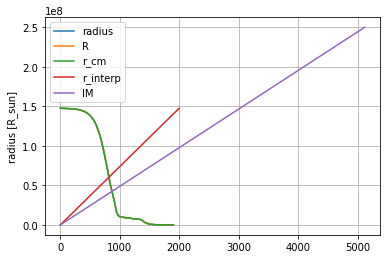

In [15]:
r_sun = 6.955e10  # cm
m_sun = 1.989e33  # gram
radius = np.array(a["radius"])
R = np.power(10,np.array(a["logR"]))
r_cm = np.array(a["radius_cm"])

r_interp = np.linspace(radius[-1], radius[0], 2000)

plt.plot(radius*r_sun, label='radius')
plt.plot(R*r_sun, label='R')
plt.plot(r_cm, label='r_cm')
plt.plot(r_interp*r_sun, label='r_interp')


plt.plot(np.array(df['radius']), label='IM')


plt.legend()
plt.xlabel("")
plt.ylabel("radius [R_sun]")
plt.grid()
plt.show()

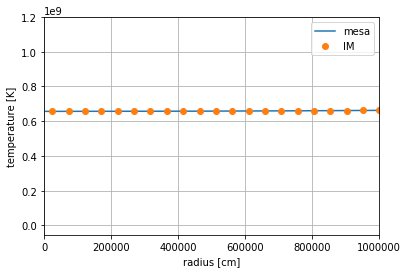

In [23]:
temp = np.array(a["temperature"])
T = np.power(10,np.array(a["logT"]))

T_interp = np.interp(r_interp, radius[::-1], temp[::-1])

plt.plot(radius*r_sun,temp,label='mesa')
#plt.plot(R*r_sun,T,":")
#plt.plot(r_interp*r_sun,T_interp)

plt.plot(np.array(df['radius']),np.array(df['temperature']),"o",label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("temperature [K]")

plt.xlim(0,1000000)


plt.grid()
plt.legend()
plt.show()

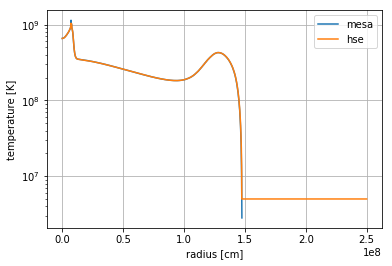

In [14]:
temp = np.array(a["temperature"])
T = np.power(10,np.array(a["logT"]))

T_interp = np.interp(r_interp, radius[::-1], temp[::-1])

plt.semilogy(radius*r_sun,temp,label='mesa')
#plt.semilogy(R*r_sun,T,":")
#plt.semilogy(r_interp,T_interp)

plt.semilogy(np.array(df['radius']),np.array(df['temperature']),label='hse')

plt.xlabel("radius [cm]")
plt.ylabel("temperature [K]")
plt.legend()
plt.grid()
#plt.show()
plt.savefig("temp_initial model")

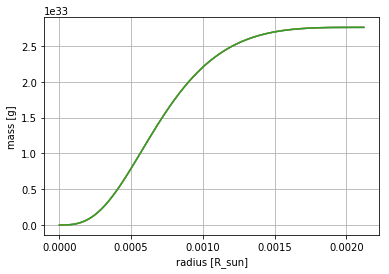

In [15]:
mass = np.array(a['mass'])
dm = np.array(a['dm'])
M = (np.add.accumulate(dm[::-1]))[::-1]
#rho = np.power(10,np.array(a["logRho"]))

m_interp = np.interp(r_interp, radius[::-1], mass[::-1])

plt.plot(R,mass*m_sun)
#plt.plot(R,dm)
plt.plot(R,M)
plt.plot(r_interp,m_interp*m_sun)
plt.xlabel("radius [R_sun]")
plt.ylabel("mass [g]")
plt.grid()
plt.show()

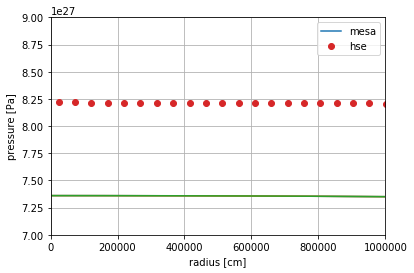

In [26]:
pressure = np.array(a['pressure'])
P = np.power(10,np.array(a["logP"]))

p_interp = np.interp(r_interp, radius[::-1], pressure[::-1])

plt.plot(R*r_sun,pressure,label='mesa')
plt.plot(R*r_sun,P)
plt.plot(r_interp*r_sun,p_interp)

plt.plot(np.array(df['radius']),np.array(df['pressure']),"o",label='hse')

plt.xlabel("radius [cm]")
plt.ylabel("pressure [Pa]")

plt.xlim(0,1000000)
plt.ylim(7e27,9e27)
plt.legend()
plt.grid()
#plt.show()
plt.savefig("pressure_initial_model")

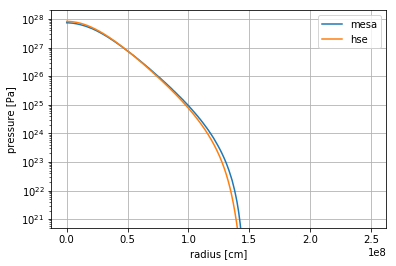

In [17]:
pressure = np.array(a['pressure'])
P = np.power(10,np.array(a["logP"]))

p_interp = np.interp(r_interp, radius[::-1], pressure[::-1])

plt.semilogy(R*r_sun,pressure,label='mesa')
#plt.semilogy(R*r_sun,P)
#plt.semilogy(r_interp*r_sun,p_interp)

plt.semilogy(np.array(df['radius']),np.array(df['pressure']),label='hse')

plt.xlabel("radius [cm]")
plt.ylabel("pressure [Pa]")
plt.legend()
plt.ylim(5e20,2e28)
plt.grid()
plt.show()

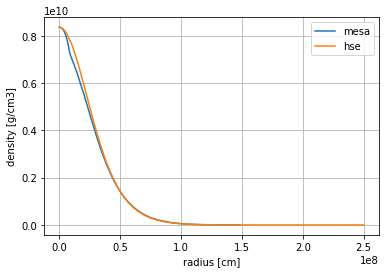

In [18]:
rho = np.power(10,np.array(a["logRho"]))

vol = []
r1 = r_cm[::-1]
vol.append(4/3*np.pi*r1[0]*r1[0]*r1[0])

for i in range(1, r1.shape[0]):
    vol.append(4/3*np.pi*r1[i]*r1[i]*r1[i]-4/3*np.pi*r1[i-1]*r1[i-1]*r1[i-1])

dv = dm/rho

#plt.plot(radius,dv)
#plt.plot(radius,vol[::-1])
plt.plot(radius*r_sun,rho,label='mesa')

plt.plot(np.array(df['radius']),np.array(df['density']),label='hse')

plt.xlabel("radius [cm]")
plt.ylabel("density [g/cm3]")
plt.legend()
plt.grid()
#plt.show()
plt.savefig("density_initial_model.png")

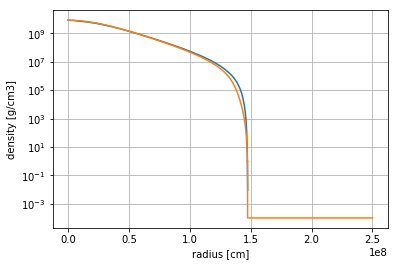

In [13]:
plt.semilogy(radius*r_sun,rho,label='mesa')

plt.semilogy(np.array(df['radius']),np.array(df['density']),label='hse')

plt.xlabel("radius [cm]")
plt.ylabel("density [g/cm3]")
plt.grid()
plt.show()

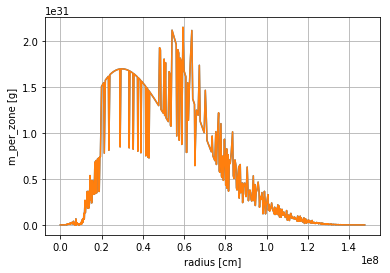

In [30]:
dmm = []
mass1 = mass[::-1]
dmm.append(mass1[0])

for i in range(1, mass1.shape[0]):
    dmm.append(mass1[i]-mass1[i-1])

dmmm = np.array(dmm)

plt.plot(radius*r_sun,dm)
plt.plot(radius*r_sun,dmmm[::-1]*m_sun)
plt.xlabel("radius [cm]")
plt.ylabel("m_per_zone [g]")
plt.grid()
plt.show()

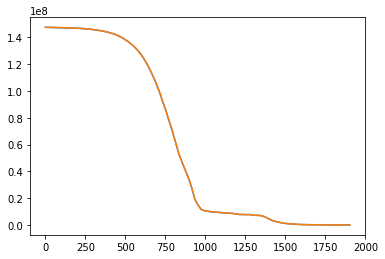

In [10]:
r_center = []

for i in range(r_cm.shape[0]-1):
    r_center.append((r_cm[i]+r_cm[i+1])/2)

r_center.append(r_cm[-1]/2)

plt.plot(r_center)
plt.plot(r_cm)
plt.show()

In [260]:
data = pd.DataFrame(columns = ['r_center [cm]'],data = r_center[::-1])
data['density [g/cm3]'] = rho[::-1]
data['temperature [K]'] = temp[::-1]
data['pressure'] = pressure[::-1]
data['neon-20'] = 0.4
data['oxygen-16'] = 0.6
#data['ash'] = 0
data.head()

,r_center [cm],density [g/cm3],temperature [K],pressure,neon-20,oxygen-16
0,2119.370293,8.357089e+09,6.565769e+08,7.360446e+27,0.4,0.6
1,4285.066756,8.357088e+09,6.565813e+08,7.360446e+27,0.4,0.6
2,4375.817692,8.357088e+09,6.565818e+08,7.360446e+27,0.4,0.6
3,4450.954786,8.357088e+09,6.565822e+08,7.360446e+27,0.4,0.6
4,4511.489139,8.357088e+09,6.565826e+08,7.360446e+27,0.4,0.6


In [262]:
data.shape

(1903, 6)

In [261]:
f = open("/Users/sailor/Desktop/asro_work/zingale_mesa/kepler_zingale_ONe6040-final.raw", "w") 

for i in range(1903):
    for j in data.columns:
        f.write(str(data[j][i]))
        f.write(' ')
    f.write('\n')
f.close()

In [13]:
str(data[data.columns[0]][0])

'2119.37029311318'

In [14]:
r_cm

array([1.47652019e+08, 1.47629896e+08, 1.47617818e+08, ...,
       4.42024246e+03, 4.33139293e+03, 4.23874059e+03])

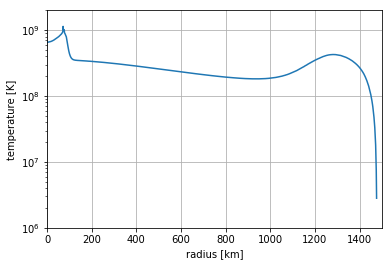

In [15]:
#plt.plot(r_cm, label='r_cm')
plt.semilogy(r_cm/1e5, T, label='r_cm/r_sun')
plt.xlim(0,1.5e3)
plt.ylim(1e6,2e9)
plt.xlabel("radius [km]")
plt.ylabel("temperature [K]")
plt.grid()

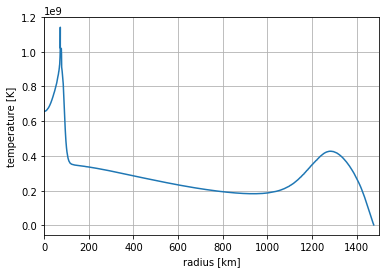

In [16]:
#plt.plot(r_cm, label='r_cm')
plt.plot(r_cm/1e5, T, label='r_cm/r_sun')
plt.xlim(0,1.5e3)
#plt.ylim(1e6,2e9)
plt.xlabel("radius [km]")
plt.ylabel("temperature [K]")
plt.grid()

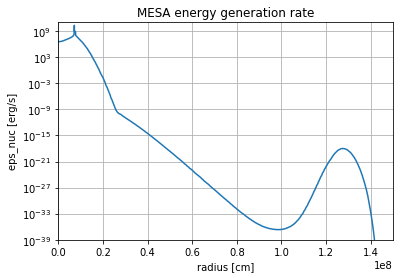

In [51]:
rho = np.power(10,np.array(a["logRho"]))
eps_nuc = a.eps_nuc

plt.semilogy(radius*r_sun,eps_nuc)
plt.xlabel("radius [cm]")
plt.ylabel("eps_nuc [erg/s]")
plt.ylim(1e-39,1e11)
plt.xlim(0,1.5e8)
plt.grid()
plt.title("MESA energy generation rate")
#plt.show()
plt.savefig("MESA_enuc.png")

NameError: name 'r_center' is not defined

In [214]:
rang = 3.e8

In [215]:
s = rang/256/100000
s

11.71875

In [216]:
t = rang/2/100000
t

1500.0

In [217]:
(t-max(r_cm)/100000)/s

2.0036104743262015

In [231]:
max(r_cm)

147652018.975399

In [264]:
149970703.1/2560

58582.305898437495

In [292]:
k=2.5e8/5120
k

48828.125

In [293]:
1562500/k

32.0

In [290]:
2560/1500

1.7066666666666668

In [289]:
5120/2500

2.048

In [288]:
1903/1476

1.2892953929539295

In [307]:
250000000/5120

48828.125

In [308]:
1562500.000/48828.125

32.0

In [309]:
781250/48828.125

16.0

In [311]:
5e8/128*2

7812500.0

In [312]:
5e8/64*2

15625000.0

In [313]:
5e8/1280

390625.0

In [315]:
5e8/256*2/10

390625.0

In [326]:
5e8/256*2/10

390625.0

In [318]:
3e8/256/1e2/1e3

11.71875

In [329]:
2.5e8/5120

48828.125

In [322]:
2.5e8/5120

48828.125

In [328]:
5e8/256

1953125.0

In [330]:
390625/48828.125

8.0

In [333]:
3500/256

13.671875

In [335]:
195312.5000/12207.03125

16.0

In [336]:
1e4/60

166.66666666666666

In [8]:
min(r_cm)

4238.74058622636